In [401]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import neighbors, linear_model
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.svm import SVC
import pydot
# %matplotlib inline

# Question I: Revisiting HW4 Bank Classication with New Tools (for dataset A) 

# I. Loading the dataset and performing data preprocessing

In [402]:
bank_addidtional_full = "bank-additional.csv"

data = pd.read_csv(bank_addidtional_full, sep = ';')
df = pd.DataFrame(data)
df.head(10)

age           job   marital            education  default  housing  \
0   30   blue-collar   married             basic.9y       no      yes   
1   39      services    single          high.school       no       no   
2   25      services   married          high.school       no      yes   
3   38      services   married             basic.9y       no  unknown   
4   47        admin.   married    university.degree       no      yes   
5   32      services    single    university.degree       no       no   
6   32        admin.    single    university.degree       no      yes   
7   41  entrepreneur   married    university.degree  unknown      yes   
8   31      services  divorced  professional.course       no       no   
9   35   blue-collar   married             basic.9y  unknown       no   

      loan    contact month day_of_week ...  campaign  pdays  previous  \
0       no   cellular   may         fri ...         2    999         0   
1       no  telephone   may         fri ...         4    999         0   
2       no  telephone   jun         wed ...         1    999         0   
3  unknown  telephone   jun         fri ...         3    999         0   
4       no   cellular   nov         mon ...         1    999         0   
5       no   cellular   sep         thu ...         3    999         2   
6       no   cellular   sep         mon ...         4    999         0   
7       no   cellular   nov         mon ...         2    999         0   
8       no   cellular   nov         tue ...         1    999         1   
9       no  telephone   may         thu ...         1    999         0   

      poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0  nonexistent         -1.8          92.893          -46.2      1.313   
1  nonexistent          1.1          93.994          -36.4      4.855   
2  nonexistent          1.4          94.465          -41.8      4.962   
3  nonexistent          1.4          94.465          -41.8      4.959   
4  nonexistent         -0.1          93.200          -42.0      4.191   
5      failure         -1.1          94.199          -37.5      0.884   
6  nonexistent         -1.1          94.199          -37.5      0.879   
7  nonexistent         -0.1          93.200          -42.0      4.191   
8      failure         -0.1          93.200          -42.0      4.153   
9  nonexistent          1.1          93.994          -36.4      4.855   

   nr.employed   y  
0       5099.1  no  
1       5191.0  no  
2       5228.1  no  
3       5228.1  no  
4       5195.8  no  
5       4963.6  no  
6       4963.6  no  
7       5195.8  no  
8       5195.8  no  
9       5191.0  no  

[10 rows x 21 columns]

We first check for missing values in the dataset. The data is complete and there is no missing values

In [403]:
print(df.isnull().sum().sum())
print(df.shape)
df.info()

0
(4119, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
age               4119 non-null int64
job               4119 non-null object
marital           4119 non-null object
education         4119 non-null object
default           4119 non-null object
housing           4119 non-null object
loan              4119 non-null object
contact           4119 non-null object
month             4119 non-null object
day_of_week       4119 non-null object
duration          4119 non-null int64
campaign          4119 non-null int64
pdays             4119 non-null int64
previous          4119 non-null int64
poutcome          4119 non-null object
emp.var.rate      4119 non-null float64
cons.price.idx    4119 non-null float64
cons.conf.idx     4119 non-null float64
euribor3m         4119 non-null float64
nr.employed       4119 non-null float64
y                 4119 non-null object
dtypes: float64(5), int64(5), object(11)
memory usage: 675.9+

Then we convert all the catogrical columns to numerical columns. Also, dropping the duration column since is a very predictive variable 

In [404]:
df.shape
df._get_numeric_data().head()
df['y'] = df['y'].map({'yes': 1, 'no': 0})
df.drop(['duration'], axis=1, inplace=True)
df = pd.get_dummies(df,drop_first=True)
df.head()

age  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   30         2    999         0          -1.8          92.893   
1   39         4    999         0           1.1          93.994   
2   25         1    999         0           1.4          94.465   
3   38         3    999         0           1.4          94.465   
4   47         1    999         0          -0.1          93.200   

   cons.conf.idx  euribor3m  nr.employed  y        ...         month_may  \
0          -46.2      1.313       5099.1  0        ...                 1   
1          -36.4      4.855       5191.0  0        ...                 1   
2          -41.8      4.962       5228.1  0        ...                 0   
3          -41.8      4.959       5228.1  0        ...                 0   
4          -42.0      4.191       5195.8  0        ...                 0   

   month_nov  month_oct  month_sep  day_of_week_mon  day_of_week_thu  \
0          0          0          0                0                0   
1          0          0          0                0                0   
2          0          0          0                0                0   
3          0          0          0                0                0   
4          1          0          0                1                0   

   day_of_week_tue  day_of_week_wed  poutcome_nonexistent  poutcome_success  
0                0                0                     1                 0  
1                0                0                     1                 0  
2                0                1                     1                 0  
3                0                0                     1                 0  
4                0                0                     1                 0  

[5 rows x 53 columns]

In [405]:
df.shape

(4119, 53)

In [406]:
cols = list(df.columns.values) #Make a list of all of the columns in the df
cols.pop(cols.index('y')) #Remove b from list
df = df[cols + ['y']] #Create new dataframe with columns in the order you want

According to UCI dataset description, the pdays columns (which represents the number of days passed by after the client was last contacted from a previous campaign) has some 999 values which means that client was not previously contacted. We replaced these 999 values with 0 since samples with 999 entries would be considered as an outliers when it comes to data cleaning. There was found to be 3,959 samples that in the pdays column that had to be replaced with 0 instead of 999



999    3959
3        52
6        42
4        14
7        10
10        8
12        5
5         4
2         4
9         3
1         3
13        2
18        2
16        2
15        2
0         2
14        1
19        1
21        1
17        1
11        1
Name: pdays, dtype: int64

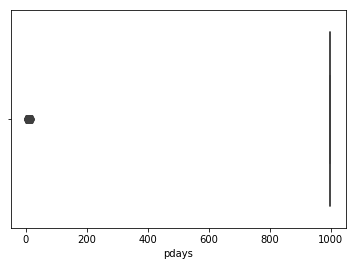

In [407]:
sns.boxplot(x=df['pdays'])
df['pdays'].value_counts()
# data['pdays'].isna().sum().sum()

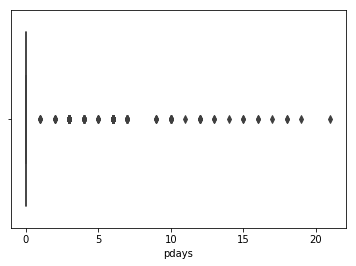

In [408]:
df.pdays = df.pdays.replace({999: 0 })
df[df['pdays'] == 999].count()
sns.boxplot(x=df['pdays'])

In [409]:
df['pdays'].value_counts()

0     3961
3       52
6       42
4       14
7       10
10       8
12       5
2        4
5        4
1        3
9        3
18       2
15       2
16       2
13       2
19       1
17       1
14       1
11       1
21       1
Name: pdays, dtype: int64

Now detecting the outliers and keeping samples that are only within 3 standard deviations

In [410]:
# df[(np.abs(stats.zscore(df)) < 3).all(axis=1)].shape
# keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.

In [411]:
print(df.shape)
df.head()

(4119, 53)


age  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   30         2      0         0          -1.8          92.893   
1   39         4      0         0           1.1          93.994   
2   25         1      0         0           1.4          94.465   
3   38         3      0         0           1.4          94.465   
4   47         1      0         0          -0.1          93.200   

   cons.conf.idx  euribor3m  nr.employed  job_blue-collar ...  month_nov  \
0          -46.2      1.313       5099.1                1 ...          0   
1          -36.4      4.855       5191.0                0 ...          0   
2          -41.8      4.962       5228.1                0 ...          0   
3          -41.8      4.959       5228.1                0 ...          0   
4          -42.0      4.191       5195.8                0 ...          1   

   month_oct  month_sep  day_of_week_mon  day_of_week_thu  day_of_week_tue  \
0          0          0                0                0                0   
1          0          0                0                0                0   
2          0          0                0                0                0   
3          0          0                0                0                0   
4          0          0                1                0                0   

   day_of_week_wed  poutcome_nonexistent  poutcome_success  y  
0                0                     1                 0  0  
1                0                     1                 0  0  
2                1                     1                 0  0  
3                0                     1                 0  0  
4                0                     1                 0  0  

[5 rows x 53 columns]

In [412]:
df['y'].value_counts()

0    3668
1     451
Name: y, dtype: int64

In [413]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 53 columns):
age                              4119 non-null int64
campaign                         4119 non-null int64
pdays                            4119 non-null int64
previous                         4119 non-null int64
emp.var.rate                     4119 non-null float64
cons.price.idx                   4119 non-null float64
cons.conf.idx                    4119 non-null float64
euribor3m                        4119 non-null float64
nr.employed                      4119 non-null float64
job_blue-collar                  4119 non-null uint8
job_entrepreneur                 4119 non-null uint8
job_housemaid                    4119 non-null uint8
job_management                   4119 non-null uint8
job_retired                      4119 non-null uint8
job_self-employed                4119 non-null uint8
job_services                     4119 non-null uint8
job_student                      41

In [414]:
df.head(10)

age  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   30         2      0         0          -1.8          92.893   
1   39         4      0         0           1.1          93.994   
2   25         1      0         0           1.4          94.465   
3   38         3      0         0           1.4          94.465   
4   47         1      0         0          -0.1          93.200   
5   32         3      0         2          -1.1          94.199   
6   32         4      0         0          -1.1          94.199   
7   41         2      0         0          -0.1          93.200   
8   31         1      0         1          -0.1          93.200   
9   35         1      0         0           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed  job_blue-collar ...  month_nov  \
0          -46.2      1.313       5099.1                1 ...          0   
1          -36.4      4.855       5191.0                0 ...          0   
2          -41.8      4.962       5228.1                0 ...          0   
3          -41.8      4.959       5228.1                0 ...          0   
4          -42.0      4.191       5195.8                0 ...          1   
5          -37.5      0.884       4963.6                0 ...          0   
6          -37.5      0.879       4963.6                0 ...          0   
7          -42.0      4.191       5195.8                0 ...          1   
8          -42.0      4.153       5195.8                0 ...          1   
9          -36.4      4.855       5191.0                1 ...          0   

   month_oct  month_sep  day_of_week_mon  day_of_week_thu  day_of_week_tue  \
0          0          0                0                0                0   
1          0          0                0                0                0   
2          0          0                0                0                0   
3          0          0                0                0                0   
4          0          0                1                0                0   
5          0          1                0                1                0   
6          0          1                1                0                0   
7          0          0                1                0                0   
8          0          0                0                0                1   
9          0          0                0                1                0   

   day_of_week_wed  poutcome_nonexistent  poutcome_success  y  
0                0                     1                 0  0  
1                0                     1                 0  0  
2                1                     1                 0  0  
3                0                     1                 0  0  
4                0                     1                 0  0  
5                0                     0                 0  0  
6                0                     1                 0  0  
7                0                     1                 0  0  
8                0                     0                 0  0  
9                0                     1                 0  0  

[10 rows x 53 columns]

# II. Dividing data into training and testing

Splitting the data into train and test data. The test data size chosen to be 30%.

In [415]:
X = df.drop('y',axis=1)
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30,random_state=42)

# III. Applying classification: 

# a) Decision Tree

In [416]:
dtree = DecisionTreeClassifier()

In [417]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Predicting:

In [418]:
predictions = dtree.predict(X_test)

Evaluating the performance of the model:

In [419]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[1003  102]
 [  91   40]]


              precision    recall  f1-score   support

           0       0.92      0.91      0.91      1105
           1       0.28      0.31      0.29       131

   micro avg       0.84      0.84      0.84      1236
   macro avg       0.60      0.61      0.60      1236
weighted avg       0.85      0.84      0.85      1236



Tree Visualization using the the built-in visualization from Scikit learn. This requires to install the pydot library and Graphviz.

In [420]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(X_train.columns)
features

['age',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'education_basic.6y',
 'education_basic.9y',
 'education_high.school',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'education_unknown',
 'default_unknown',
 'default_yes',
 'housing_unknown',
 'housing_yes',
 'loan_unknown',
 'loan_yes',
 'contact_telephone',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'day_of_week_mon',
 'day_of_week_thu',
 'day_of_week_tue',
 'day_of_week_wed',
 'poutcome_nonexistent',
 'poutcome_success']

In [421]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png()) 

# b) Random Forests (RF)

In [422]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [423]:
rfc_pred = rfc.predict(X_test)

In [424]:
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))

[[1078   27]
 [ 104   27]]


              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1105
           1       0.50      0.21      0.29       131

   micro avg       0.89      0.89      0.89      1236
   macro avg       0.71      0.59      0.62      1236
weighted avg       0.87      0.89      0.87      1236

